In [31]:
import os, glob, warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy.stats import zscore

import numpy as np
from scipy import interpolate


In [106]:
file_list = ['commercial_aribnb_30s',
             'commercial_att_30s',
             'commercial_carscom_30s',
             'commercial_cookies_30s',
             'commercial_dominos_30s',
             'commercial_doritos_30s',
             'commercial_expedia_30s',
             'commercial_google_pixel_30s',
             'commercial_hr_block_30s',
             'commercial_jersey_mikes_30s',
             'commercial_lego_30s',
             'commercial_meta_quest_2_30s',
             'commercial_milk_30s',
             'commercial_progressive_30s',
             'commercial_publix_30s',
             'commercial_puma_30s',
             'commercial_starbucks_30s',
             'commercial_under_armour_30s',
             'health_alcohol_30s',
             'health_alzheimers_30s',
             'health_covid_vaccine_30s',
             'health_diet_30s',
             'health_drunk_driving_30s',
             'health_fitness_30s',
             'health_kidney_30s',
             'health_mantherapy_30s',
             'health_prediabetes_30s',
             'health_stroke_30s',
             'health_vaping_30s',
             'health_weight_30s']

file_list.sort()

print(len(file_list))

endings = ['_50nd',
           '_50wd',
           '_100']

file_list[:3]

30


['commercial_aribnb_30s', 'commercial_att_30s', 'commercial_carscom_30s']

In [133]:
data_folder = '../data/02_aggregate_video_data/'

all_data = []
labels = []

for curr_file in file_list:
    for curr_ending in endings:
        #curr_ending = endings[2]
        #print(curr_ending)
        file_to_load = data_folder + curr_file + curr_ending + '.npy'
        loaded_data = np.load(file_to_load)
        [n, y] = loaded_data.shape
        all_data.extend(loaded_data)
        labels.extend( [curr_file] * n)
    

In [134]:
X = np.asarray(all_data)
print(X.shape)
X = np.nan_to_num(X)

(1769, 725)


(1769, 475)


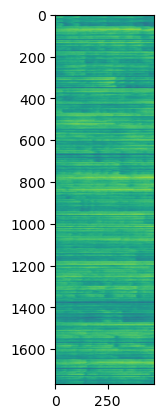

In [135]:
X = X[:, 250:]
print(X.shape)
plt.imshow(X);


In [136]:
curr_ending

'_100'

In [138]:
y = np.asarray(labels)
y[:25]

array(['commercial_aribnb_30s', 'commercial_aribnb_30s',
       'commercial_aribnb_30s', 'commercial_aribnb_30s',
       'commercial_aribnb_30s', 'commercial_aribnb_30s',
       'commercial_aribnb_30s', 'commercial_aribnb_30s',
       'commercial_aribnb_30s', 'commercial_aribnb_30s',
       'commercial_aribnb_30s', 'commercial_aribnb_30s',
       'commercial_aribnb_30s', 'commercial_aribnb_30s',
       'commercial_aribnb_30s', 'commercial_aribnb_30s',
       'commercial_aribnb_30s', 'commercial_aribnb_30s',
       'commercial_aribnb_30s', 'commercial_aribnb_30s',
       'commercial_aribnb_30s', 'commercial_aribnb_30s',
       'commercial_aribnb_30s', 'commercial_aribnb_30s',
       'commercial_aribnb_30s'], dtype='<U27')

In [139]:
#!pip install sktime

In [140]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#X, y = load_arrow_head()
X_train, X_test, y_train, y_test = train_test_split(X, y)
classifier = TimeSeriesForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.5056433408577878

In [141]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.024830699774266364

In [70]:
len(np.unique(y))/len(y)

0.05084745762711865

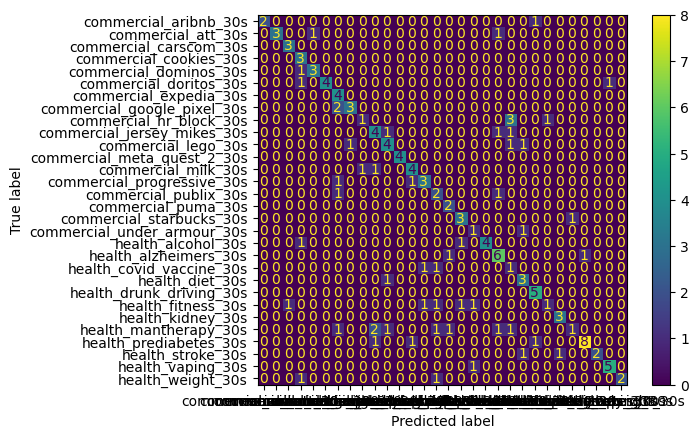

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
plt.show()

In [132]:
np.sum(np.diag(cm, k=0))/148

0.6351351351351351

In [131]:
len(y_pred)

148

(20, 725)


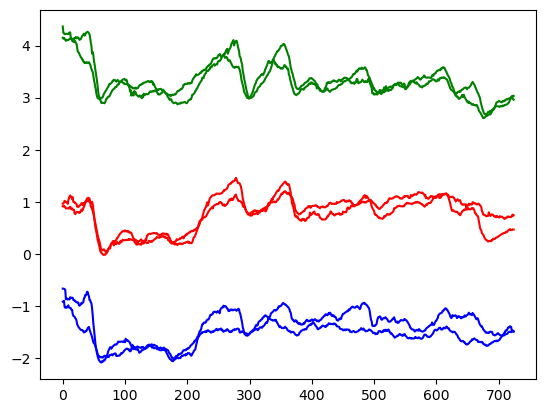

In [163]:
video_file = 'commercial_aribnb_30s'

file_to_load = data_folder + video_file + '_100' + '.npy' 
d100 = np.load(file_to_load)
#d100 = np.nan_to_num(d100)

d100_1 = np.nanmean(d100[:10,:], axis = 0)
d100_2 = np.nanmean(d100[10:,:], axis = 0)

plt.plot(d100_1, c = 'g')
plt.plot(d100_2, c = 'g')


file_to_load = data_folder + video_file + '_50nd' + '.npy' 
d50nd = np.load(file_to_load)
#print(d50nd.shape)

d50nd_1 = np.nanmean(d50nd[:10,:], axis = 0)
d50nd_2 = np.nanmean(d50nd[10:,:], axis = 0)

plt.plot(d50nd_1 - 3, c = 'r')
plt.plot(d50nd_2 - 3, c = 'r')


file_to_load = data_folder + video_file + '_50wd' + '.npy' 
d50wd = np.load(file_to_load)
print(d50wd.shape)

d50wd_1 = np.nanmean(d50wd[:10,:], axis = 0)
d50wd_2 = np.nanmean(d50wd[10:,:], axis = 0)

plt.plot(d50wd_1 - 5, c = 'b')
plt.plot(d50wd_2 - 5, c = 'b')